In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

import os 

os.getcwd()

'/Users/shinojphilipjohn/Github/data-engg-science-projects/customer_churn_ml/notebooks'

In [54]:
df=pd.read_csv("/Users/shinojphilipjohn/Github/data-engg-science-projects/customer_churn_ml/dataset/Telco-Customer-Churn_feature_engg.csv")

In [55]:

# Removing target variable and allocating
df.drop("Unnamed: 0",axis=1,inplace=True)
X=df.drop("Churn",axis=1)
y=df["Churn"]

#Since churn is imbalanced startify=y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=14,stratify=y)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
6636       0              0        1           1      10             1   
4186       1              0        0           1      62             1   
2680       1              0        1           1      71             1   
5025       1              0        1           1       6             1   
4026       1              0        1           1      72             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
6636                 0           70.30        676.15   
4186                 1          104.05       6590.50   
2680                 0           85.45       6029.90   
5025                 1           69.80        377.85   
4026                 1          114.30       8058.55   

      MultipleLines_No_phone_service  ...  StreamingMovies_No  \
6636                               0  ...                   1   
4186                               0  ...                   0   
2680                   

In [56]:
df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No_phone_service             0
MultipleLines_No                           0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber_optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineSecurity_No_internet_service         0
OnlineBackup_Yes                           0
OnlineBackup_No                            0
OnlineBackup_No_internet_service           0
DeviceProt

In [57]:
# Model fitting -Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=14,max_iter=1000)
lr_model.fit(X_train,y_train)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,14
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [58]:
#Predictions
y_pred=lr_model.predict(X_test)
y_prob=lr_model.predict_proba(X_test)[:,1]
print(y_pred)
print(y_prob)

[0 0 1 ... 0 0 0]
[0.0127597  0.13521231 0.53631866 ... 0.48833926 0.49649398 0.00498603]


In [64]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("ROC AUC: ",roc_auc_score(y_test,y_prob))


Accuracy:  0.8019872249822569
Precision:  0.6443768996960486
Recall:  0.5668449197860963
F1 Score:  0.6031294452347084
Confusion Matrix:  [[918 117]
 [162 212]]
ROC AUC:  0.8517231134878194


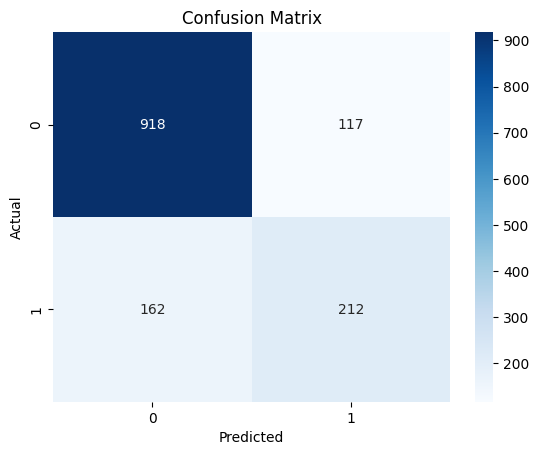

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Reflection

# Recall is lesser than Precision likely due to class imbalance.
# Can use better models and tuning.
# ROC-AUC Score is good.